In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("eta_synthetic_dataset.csv")

In [3]:
df.shape

(100, 9)

In [4]:
X = df.drop("Processing_Time", axis=1)
y = df["Processing_Time"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Mean Absolute Error (MAE): {mae:.2f} hours")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 21.82 hours
R² Score: 0.57


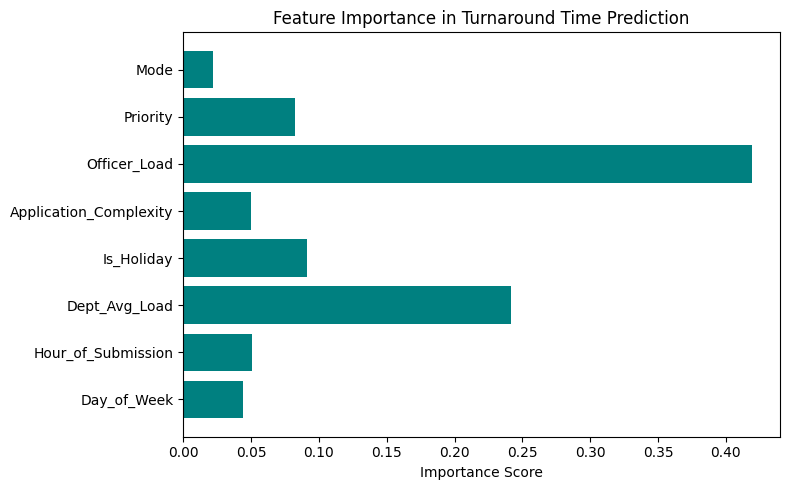

In [10]:
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='teal')
plt.title("Feature Importance in Turnaround Time Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [11]:
sample = X_test.iloc[0:1]
predicted_time = model.predict(sample)[0]
print("\nSample prediction:")
print(sample)
print(f"Predicted Processing Time: {predicted_time:.2f} hours")



Sample prediction:
    Day_of_Week  Hour_of_Submission  Dept_Avg_Load  Is_Holiday  \
83            5                  10       0.494173           0   

    Application_Complexity  Officer_Load  Priority  Mode  
83                       2      0.902029         2     0  
Predicted Processing Time: 33.59 hours


In [12]:
joblib.dump(model, "EAT_predictor.pkl")

['EAT_predictor.pkl']